In [13]:
import pandas  as pd
import matplotlib.pyplot as plt
import warnings

# 关闭警告显示
warnings.filterwarnings("ignore")

# 读取【air_new_data.xlsx】工作簿的数据
airline_data = pd.read_excel('air_new_data.xlsx')
# 查看数据的前 10 行信息
airline_data.head(10)


,Unnamed: 0,会员卡号,入会时间,第一次飞时间,性别,会员卡级别,城市,省份,国家,年龄,观测窗结束时间,观测窗口飞行次数,消费总金额,近2年乘机次数,近2年乘机金额,飞行总公里,最近一次飞行时间,总累计积分,最近一次间隔天数
0,0,54993,2006-11-02,2008-12-24,男,6,.,北京,CN,31,2014-03-31,210.0,473748.0,52.0,118437.0,580717.0,2014-03-31,619760,0
1,1,49737,2010-10-30,2010-10-31,男,6,石狮,福建,CN,30,2014-03-31,197.0,154495.0,49.0,38623.0,275800.0,2014-03-31,134178,0
2,2,20121,2004-11-30,2005-01-05,男,6,汕头市,广东省,CN,66,2014-03-31,193.0,153572.0,48.0,38393.0,209912.0,2014-03-31,242611,0
3,3,12326,2008-05-21,2008-06-12,男,6,.,北京,CN,40,2014-03-31,189.0,178545.0,47.0,44636.0,235687.0,2014-03-31,262134,0
4,4,62751,2007-05-08,2007-08-12,男,6,北京,北京,CN,45,2014-03-31,166.0,184015.0,41.0,46003.0,229303.0,2014-03-31,260880,0
5,5,49017,2009-01-17,2009-03-01,男,6,北京市,北京,CN,42,2014-03-31,0.0,0.0,0.0,0.0,0.0,2014-03-31,132891,0
6,6,2115,2005-03-17,2005-03-17,男,6,汕头,广东,CN,54,2014-03-31,139.0,99668.0,34.0,24917.0,129859.0,2014-03-31,159864,0
7,7,29181,2005-03-27,2005-03-27,男,6,郑州,河南,CN,42,2014-03-31,NaN,NaN,NaN,NaN,NaN,2014-03-31,118238,0
8,8,28852,2012-10-30,2012-10-31,女,6,深圳,广东,CN,46,2014-03-31,128.0,66616.0,32.0,16654.0,98649.0,2014-03-31,66351,0
9,9,55364,2008-05-27,2008-09-16,男,6,汕头,广东,CN,40,2014-03-31,127.0,85137.0,31.0,21284.0,131400.0,2014-03-31,101599,0


In [14]:
# 3.2 数据处理
# 步骤一：对出现的脏数据进行清洗  
# 步骤二：提取案例模型主要分析的数据  
# 步骤三：另存数据为【clean_dfile.xlsx】工作簿
# 查看数据是否有空值
airline_data.isna()
# 去除“最近一次间隔天数”为空的记录
airline_notnull = airline_data.dropna(subset=['最近一次间隔天数'])
# 去除“近2年乘机次数”为空的记录
airline_notnull = airline_notnull.dropna(subset=['近2年乘机次数'])
# 去除“消费金额”为空的记录
airline_notnull = airline_notnull.dropna(subset=['近2年乘机金额'])
# 打印出处理完缺失值后的数据基本信息
airline_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61205 entries, 0 to 61210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  61205 non-null  int64         
 1   会员卡号        61205 non-null  int64         
 2   入会时间        61205 non-null  datetime64[ns]
 3   第一次飞时间      61205 non-null  datetime64[ns]
 4   性别          61202 non-null  object        
 5   会员卡级别       61205 non-null  int64         
 6   城市          59041 non-null  object        
 7   省份          58102 non-null  object        
 8   国家          61181 non-null  object        
 9   年龄          61205 non-null  int64         
 10  观测窗结束时间     61205 non-null  datetime64[ns]
 11  观测窗口飞行次数    61205 non-null  float64       
 12  消费总金额       61205 non-null  float64       
 13  近2年乘机次数     61205 non-null  float64       
 14  近2年乘机金额     61205 non-null  float64       
 15  飞行总公里       61205 non-null  float64       
 16  最近一次飞行时间    61205 non-

In [15]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61211 entries, 0 to 61210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  61211 non-null  int64         
 1   会员卡号        61211 non-null  int64         
 2   入会时间        61211 non-null  datetime64[ns]
 3   第一次飞时间      61211 non-null  datetime64[ns]
 4   性别          61208 non-null  object        
 5   会员卡级别       61211 non-null  int64         
 6   城市          59047 non-null  object        
 7   省份          58108 non-null  object        
 8   国家          61187 non-null  object        
 9   年龄          61211 non-null  int64         
 10  观测窗结束时间     61211 non-null  datetime64[ns]
 11  观测窗口飞行次数    61210 non-null  float64       
 12  消费总金额       61205 non-null  float64       
 13  近2年乘机次数     61210 non-null  float64       
 14  近2年乘机金额     61205 non-null  float64       
 15  飞行总公里       61210 non-null  float64       
 16  最近一次飞行时间    61211 non-

In [16]:
airline_notnull.describe()

,Unnamed: 0,会员卡号,会员卡级别,年龄,观测窗口飞行次数,消费总金额,近2年乘机次数,近2年乘机金额,飞行总公里,总累计积分,最近一次间隔天数
count,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000
mean,30948.155657,31481.900008,4.103652,42.533273,11.965117,11062.295275,2.589413,2765.221158,17318.260730,12696.392484,171.565134
std,17987.884324,18187.009464,0.376514,10.299384,14.116823,15375.033106,3.561136,3843.750614,21076.014508,20645.450290,181.471939
min,0.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15388.000000,15712.000000,4.000000,35.000000,3.000000,2798.000000,0.000000,699.000000,4867.000000,2854.000000,27.000000
50%,30799.000000,31473.000000,4.000000,41.000000,7.000000,5976.000000,1.000000,1494.000000,10186.000000,6450.000000,104.000000
75%,46438.000000,47248.000000,4.000000,48.000000,15.000000,13110.000000,3.000000,3277.000000,21504.000000,14466.000000,259.000000
max,62566.000000,62988.000000,6.000000,462.000000,213.000000,473748.000000,53.000000,118437.000000,580717.000000,985572.000000,729.000000


In [17]:
# 只保留消费金额非零的记录，同时去除年龄大于 100 的记录
airline = airline_notnull[airline_notnull['近2年乘机金额'] != 0]
airline = airline[airline['年龄'] <= 100]

In [18]:
# 关键字段提取
airline = airline[['会员卡号', '最近一次间隔天数', '近2年乘机次数', '近2年乘机金额']]
# 保存清洗后的数据
airline.to_excel('clean_dfile.xlsx', index=False)

In [19]:
# 查看数据描述性统计的信息
airline_notnull.describe()

,Unnamed: 0,会员卡号,会员卡级别,年龄,观测窗口飞行次数,消费总金额,近2年乘机次数,近2年乘机金额,飞行总公里,总累计积分,最近一次间隔天数
count,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000,61205.000000
mean,30948.155657,31481.900008,4.103652,42.533273,11.965117,11062.295275,2.589413,2765.221158,17318.260730,12696.392484,171.565134
std,17987.884324,18187.009464,0.376514,10.299384,14.116823,15375.033106,3.561136,3843.750614,21076.014508,20645.450290,181.471939
min,0.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15388.000000,15712.000000,4.000000,35.000000,3.000000,2798.000000,0.000000,699.000000,4867.000000,2854.000000,27.000000
50%,30799.000000,31473.000000,4.000000,41.000000,7.000000,5976.000000,1.000000,1494.000000,10186.000000,6450.000000,104.000000
75%,46438.000000,47248.000000,4.000000,48.000000,15.000000,13110.000000,3.000000,3277.000000,21504.000000,14466.000000,259.000000
max,62566.000000,62988.000000,6.000000,462.000000,213.000000,473748.000000,53.000000,118437.000000,580717.000000,985572.000000,729.000000


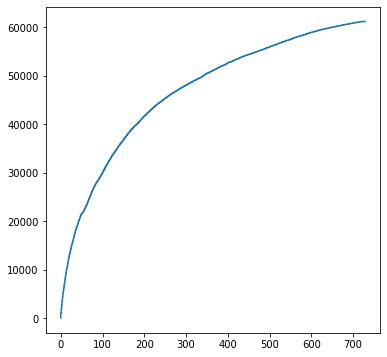

In [20]:
# 绘制 R 值的分值区间
plt.figure(figsize=(6, 6)) 
x = airline['最近一次间隔天数'].sort_values()
y = airline.index
plt.plot(x,y) 

In [21]:
# 定义函数按照区间划分标记 R 值
def calculate_r(s):
    if s <= 140:
        return 5
    elif s <= 280:
        return 4
    elif s <= 420:
        return 3
    elif s <= 560:
        return 2
    else:
        return 1
airline['R评分'] = airline['最近一次间隔天数'].agg(calculate_r)
airline

,会员卡号,最近一次间隔天数,近2年乘机次数,近2年乘机金额,R评分
0,54993,0,52.0,118437.0,5
1,49737,0,49.0,38623.0,5
2,20121,0,48.0,38393.0,5
3,12326,0,47.0,44636.0,5
4,62751,0,41.0,46003.0,5
...,...,...,...,...,...
61206,61990,727,0.0,240.0,1
61207,22456,727,0.0,335.0,1
61208,5247,728,0.0,1740.0,1
61209,15444,728,0.0,542.0,1


,会员卡号,最近一次间隔天数,近2年乘机次数,近2年乘机金额,R评分,F评分,M评分
0,54993,0,52.0,118437.0,5,5,5
1,49737,0,49.0,38623.0,5,5,5
2,20121,0,48.0,38393.0,5,5,5
3,12326,0,47.0,44636.0,5,5,5
4,62751,0,41.0,46003.0,5,5,5
...,...,...,...,...,...,...,...
61206,61990,727,0.0,240.0,1,1,1
61207,22456,727,0.0,335.0,1,1,1
61208,5247,728,0.0,1740.0,1,1,1
61209,15444,728,0.0,542.0,1,1,1


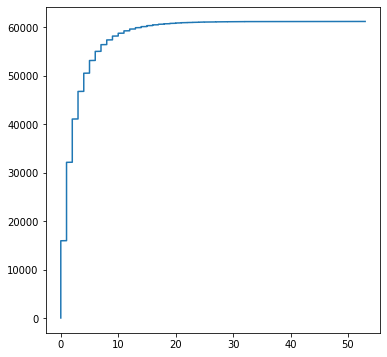

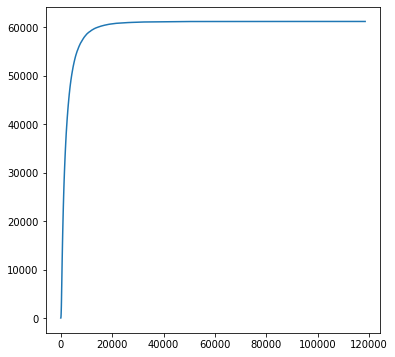

In [22]:
# 绘制 F 值的分值区间
plt.figure(figsize=(6, 6))
x = airline['近2年乘机次数'].sort_values()
y = airline.index
plt.plot(x,y)
plt.savefig('shit.jpg')
# 定义函数按照区间划分标记 F 值
def caculate_f(s):
    if s <= 4:
        return 1
    elif s <= 7:
        return 2
    elif s <= 10:
        return 3
    elif s <= 20:
        return 4
    else:
        return 5

# 标记 F 值
airline['F评分'] = airline['近2年乘机次数'].agg(caculate_f)

# 绘制 M 值的分值区间
plt.figure(figsize=(6, 6))
x = airline['近2年乘机金额'].sort_values()
y = airline.index
plt.plot(x,y)

# 定义函数按照区间划分标记 M 值
def caculate_m(s):
    if s <= 5000:
        return 1
    elif s <= 10000:
        return 2
    elif s <= 15000:
        return 3
    elif s <= 20000:
        return 4
    else:
        return 5

# 标记 M 值
airline['M评分'] = airline['近2年乘机金额'].agg(caculate_m)
# 查看数据的信息
airline

In [23]:
# 计算R评分、F评分、M评分的平均数
r_avg = airline['R评分'].mean()
f_avg = airline['F评分'].mean()
m_avg = airline['M评分'].mean()
print('R评分的均值为：{}，F评分的均值为{},M评分的均值为{}'.format(r_avg, f_avg, m_avg))

# 将R评分、F评分、M评分 的数据分别与对应的平均数做比较
airline['R评分'] = (airline['R评分'] > r_avg) * 1
airline['F评分'] = (airline['F评分'] > f_avg) * 1
airline['M评分'] = (airline['M评分'] > m_avg) * 1

# 拼接R评分、F评分、M评分
rfm_score = airline['R评分'].astype(str) + airline['F评分'].astype(str) + airline['M评分'].astype(str)

# 定义字典标记 RFM 评分档对应的用户分类名称
transform_label = {
    '111':'重要价值用户',
    '101':'重要发展用户',
    '011':'重要保持用户',
    '001':'重要挽留用户',
    '110':'一般价值用户',
    '100':'一般发展用户',
    '010':'一般保持用户',
    '000':'一般挽留用户'
}
# 将RFM评分替换成具体的客户类型
airline['客户类型'] = rfm_score.replace(transform_label)
# 查看数据的信息
airline

R评分的均值为：4.169825811301023，F评分的均值为1.2974280205235464,M评分的均值为1.2153011536324716


,会员卡号,最近一次间隔天数,近2年乘机次数,近2年乘机金额,R评分,F评分,M评分,客户类型
0,54993,0,52.0,118437.0,1,1,1,重要价值用户
1,49737,0,49.0,38623.0,1,1,1,重要价值用户
2,20121,0,48.0,38393.0,1,1,1,重要价值用户
3,12326,0,47.0,44636.0,1,1,1,重要价值用户
4,62751,0,41.0,46003.0,1,1,1,重要价值用户
...,...,...,...,...,...,...,...,...
61206,61990,727,0.0,240.0,0,0,0,一般挽留用户
61207,22456,727,0.0,335.0,0,0,0,一般挽留用户
61208,5247,728,0.0,1740.0,0,0,0,一般挽留用户
61209,15444,728,0.0,542.0,0,0,0,一般挽留用户


In [24]:
b = (airline['R评分'] == 1) * 1

In [26]:
b

0        1
1        1
2        1
3        1
4        1
        ..
61206    0
61207    0
61208    0
61209    0
61210    0
Name: R评分, Length: 61198, dtype: int64

In [28]:
# 导入matplotlib库的pyplot模块
from matplotlib import pyplot as plt
# 设置中文字体
plt.rcParams['font.family'] = ['HeiTi TC']

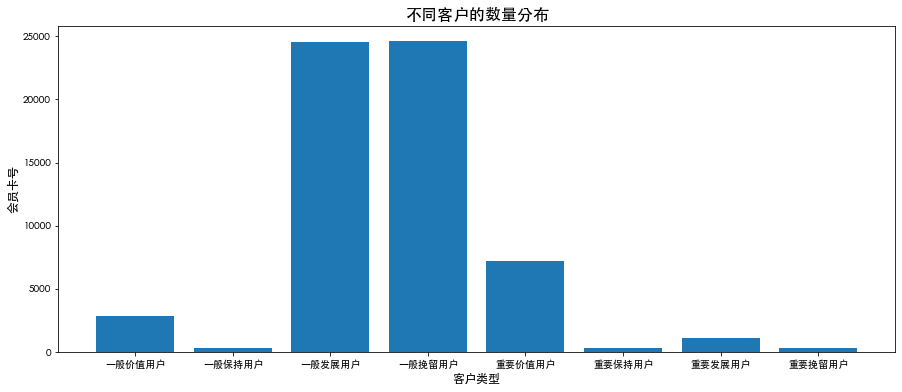

In [44]:
# 可视化客户类型的分布
customer_data = airline.groupby('客户类型')['会员卡号'].count()

plt.figure(figsize = (15,6))
plt.bar(customer_data.index,customer_data.values)
plt.xlabel('客户类型',fontsize = 12)
plt.ylabel('会员卡号',fontsize = 12)
plt.title('不同客户的数量分布', fontsize=16)
plt.savefig('不同客户的数量分布.jpg')

In [45]:
a = airline.groupby('客户类型')['会员卡号'].sum()
a

客户类型
一般价值用户     89247628
一般保持用户      9252437
一般发展用户    775878802
一般挽留用户    772674015
重要价值用户    226340535
重要保持用户     10036608
重要发展用户     34258261
重要挽留用户      8936273
Name: 会员卡号, dtype: int64